**Ilan Levy**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas_datareader.data as web
import seaborn as sns

**Creating the DataFrame for Interest Rates from FRED**

In [2]:
irates = web.DataReader(['DGS10', 'DGS1'], 'fred', start='1970', end='2022') #creating a data frame for long-term interest rate (yield) and a short-term interest rate 
irates.dropna(inplace=True) #remove those dates that do not have values assigned to them
irates.rename(columns = {'DGS10': 'Long Term Interest Rate (Yield)', 'DGS1': 'Short Term Interest Rate'}, inplace = True) #rename the columns to make it easier to visualize the data frame
 
irates_q = irates.resample('qs').mean() #resample the data into quarterly data in order to match the recession data
irates_q

,Long Term Interest Rate (Yield),Short Term Interest Rate
DATE,,
1970-01-01,7.375167,7.550000
1970-04-01,7.710000,7.446769
1970-07-01,7.457969,6.940625
1970-10-01,6.846066,5.641148
1971-01-01,5.999508,4.034262
...,...,...
2020-10-01,0.864516,0.114516
2021-01-01,1.335902,0.082459
2021-04-01,1.590781,0.059688


**Creating a column for Term Spread**

In [3]:
irates_q['Term Spread'] = (irates_q['Long Term Interest Rate (Yield)']) - (irates_q['Short Term Interest Rate']) #The term spread is the difference between a long-term interest rate (yield) and a short-term interest rate, so I made a column for it on the dataframe.
irates_q.head(5) #now we have the slope of the yield curve in a column

,Long Term Interest Rate (Yield),Short Term Interest Rate,Term Spread
DATE,,,
1970-01-01,7.375167,7.550000,-0.174833
1970-04-01,7.710000,7.446769,0.263231
1970-07-01,7.457969,6.940625,0.517344
1970-10-01,6.846066,5.641148,1.204918
1971-01-01,5.999508,4.034262,1.965246


**Creating a DataFrame with the information for recessions from FRED**

In [4]:
recession_dates = web.DataReader(['JHDUSRGDPBR'], 'fred', start='1970', end='2022') #use recession dates from Fred, match well with the excel file.
recession_dates.dropna(inplace=True)
recession_dates.rename(columns = {'JHDUSRGDPBR': 'Recession'}, inplace = True) #rename the columns to make it easier to visualize the dataframe
recession_dates

,Recession
DATE,
1970-01-01,1.0
1970-04-01,1.0
1970-07-01,1.0
1970-10-01,1.0
1971-01-01,0.0
...,...
2020-07-01,0.0
2020-10-01,0.0
2021-01-01,0.0


**Merge the two DataFrames to see connections between Recession and Term Spread**

In [5]:
merge = pd.merge(left=irates_q, right=recession_dates, left_index=True, right_index=True, how='inner') #merge both of the dataframes to see the exact dates of when recessions occur, with the term spread. 
merge

,Long Term Interest Rate (Yield),Short Term Interest Rate,Term Spread,Recession
DATE,,,,
1970-01-01,7.375167,7.550000,-0.174833,1.0
1970-04-01,7.710000,7.446769,0.263231,1.0
1970-07-01,7.457969,6.940625,0.517344,1.0
1970-10-01,6.846066,5.641148,1.204918,1.0
1971-01-01,5.999508,4.034262,1.965246,0.0
...,...,...,...,...
2020-07-01,0.650625,0.134688,0.515937,0.0
2020-10-01,0.864516,0.114516,0.750000,0.0
2021-01-01,1.335902,0.082459,1.253443,0.0


**Create Value column for plotting purposes**

In [6]:
merge['Value'] = merge['Term Spread']*merge['Recession'] #create a value column in order to graph the areas with recession more clearly
merge

,Long Term Interest Rate (Yield),Short Term Interest Rate,Term Spread,Recession,Value
DATE,,,,,
1970-01-01,7.375167,7.550000,-0.174833,1.0,-0.174833
1970-04-01,7.710000,7.446769,0.263231,1.0,0.263231
1970-07-01,7.457969,6.940625,0.517344,1.0,0.517344
1970-10-01,6.846066,5.641148,1.204918,1.0,1.204918
1971-01-01,5.999508,4.034262,1.965246,0.0,0.000000
...,...,...,...,...,...
2020-07-01,0.650625,0.134688,0.515937,0.0,0.000000
2020-10-01,0.864516,0.114516,0.750000,0.0,0.000000
2021-01-01,1.335902,0.082459,1.253443,0.0,0.000000


**Analysing solely the past year**

In [7]:
irates2022 = web.DataReader(['DGS10', 'DGS1'], 'fred', start='2021-04-15')
irates2022.dropna(inplace=True)
irates2022.rename(columns = {'DGS10': 'Long Term Interest Rate (Yield)', 'DGS1': 'Short Term Interest Rate'}, inplace = True)
irates2022

,Long Term Interest Rate (Yield),Short Term Interest Rate
DATE,,
2021-04-15,1.56,0.06
2021-04-16,1.59,0.06
2021-04-19,1.61,0.08
2021-04-20,1.58,0.07
2021-04-21,1.57,0.07
...,...,...
2022-04-07,2.66,1.78
2022-04-08,2.72,1.81
2022-04-11,2.79,1.85


In [8]:
irates2022['Term Spread'] = (irates2022['Long Term Interest Rate (Yield)']) - (irates2022['Short Term Interest Rate'])
irates2022

,Long Term Interest Rate (Yield),Short Term Interest Rate,Term Spread
DATE,,,
2021-04-15,1.56,0.06,1.50
2021-04-16,1.59,0.06,1.53
2021-04-19,1.61,0.08,1.53
2021-04-20,1.58,0.07,1.51
2021-04-21,1.57,0.07,1.50
...,...,...,...
2022-04-07,2.66,1.78,0.88
2022-04-08,2.72,1.81,0.91
2022-04-11,2.79,1.85,0.94


**PLOT 1**

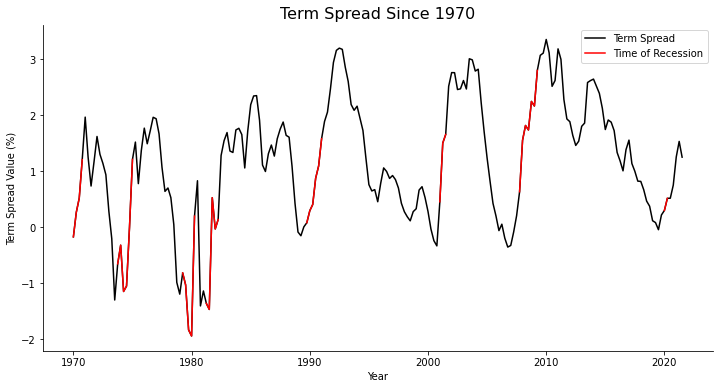

In [9]:
fig, ax = plt.subplots(figsize=(12,6)) #create plot

ax.plot(merge.index, merge['Term Spread'], label= 'Term Spread', color='black') #plot the term spread data

recession = merge #create a copy of the data in order to have the overlapping figures during the recession
recession.loc[recession['Value']==0,"Value"] = None #only keep the data that is not equal to 0, so the line plot does not make lines in between
ax.plot(recession.index, recession['Value'], label='Time of Recession', color='red') #plot the copy


ax.set_ylabel('Term Spread Value (%)', size = 10)
ax.set_xlabel('Year', size=10)
ax.set_title('Term Spread Since 1970', size=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()
plt.savefig('term_spread.svg')

plt.show()

**PLOT 2**

No handles with labels found to put in legend.


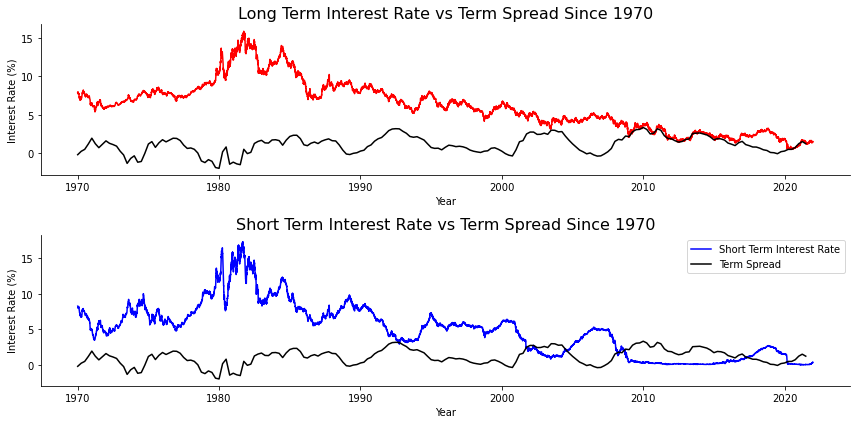

In [10]:
fig, ax = plt.subplots(2,1,figsize=(12,6))

#1

ax[0].plot(irates.index, irates['Long Term Interest Rate (Yield)'], label='Long Term Interest Rate', color='red')
ax[0].plot(merge.index, merge['Term Spread'], label='Term Spread', color='black')

ax[0].set_ylabel('Interest Rate (%)', size = 10)
ax[0].set_xlabel('Year', size=10)
ax[0].set_title('Long Term Interest Rate vs Term Spread Since 1970', size=16)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

plt.legend() #not sure why this is not working as I do have my handles to create a legend, however, this one is for Long Term Interest Rates


#2

ax[1].plot(irates.index, irates['Short Term Interest Rate'], label='Short Term Interest Rate', color='blue')
ax[1].plot(merge.index, merge['Term Spread'], label='Term Spread', color='black')

ax[1].set_ylabel('Interest Rate (%)', size = 10)
ax[1].set_xlabel('Year', size=10) 
ax[1].set_title('Short Term Interest Rate vs Term Spread Since 1970', size=16)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.legend()

fig.tight_layout() #found online to create spacing so there is no overlapping between graphs

plt.show()

**PLOT 3 (The Past Year)**

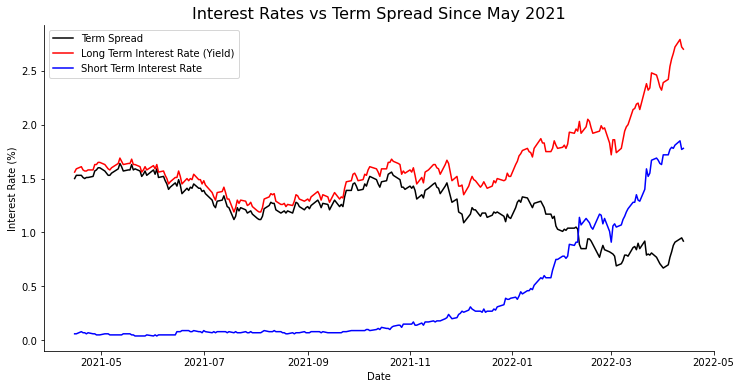

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(irates2022.index, irates2022['Term Spread'], label = 'Term Spread', color='black')
ax.plot(irates2022.index, irates2022['Long Term Interest Rate (Yield)'], label = 'Long Term Interest Rate (Yield)', color='red')
ax.plot(irates2022.index, irates2022['Short Term Interest Rate'], label = 'Short Term Interest Rate', color='blue')

ax.set_ylabel('Interest Rate (%)', size = 10)
ax.set_xlabel('Date', size=10) 
ax.set_title('Interest Rates vs Term Spread Since May 2021', size=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()

plt.savefig('term_spread_past_year.svg')

plt.show()